# Time Series Analysis with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
path = r"Time_series_analysis_and_forecast_DATASET.csv"
df = pd.read_csv(path) 

In [32]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [33]:
elecDf = df.copy()

In [34]:
elecDf['FullDate'] = pd.to_datetime(elecDf['FullDate'])

In [35]:
elecDf['Year'] = elecDf['FullDate'].dt.year
elecDf['Month'] = elecDf['FullDate'].dt.month
elecDf['Day'] = elecDf['FullDate'].dt.day
elecDf['Hour'] = elecDf['FullDate'].dt.hour
elecDf

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Year,Month,Day,Hour
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,2010,9,1,0
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,2010,9,1,1
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,2010,9,1,2
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,2010,9,1,3
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,2010,9,1,4
...,...,...,...,...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,2021,2,28,19
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,2021,2,28,20
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,2021,2,28,21
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000,2021,2,28,22


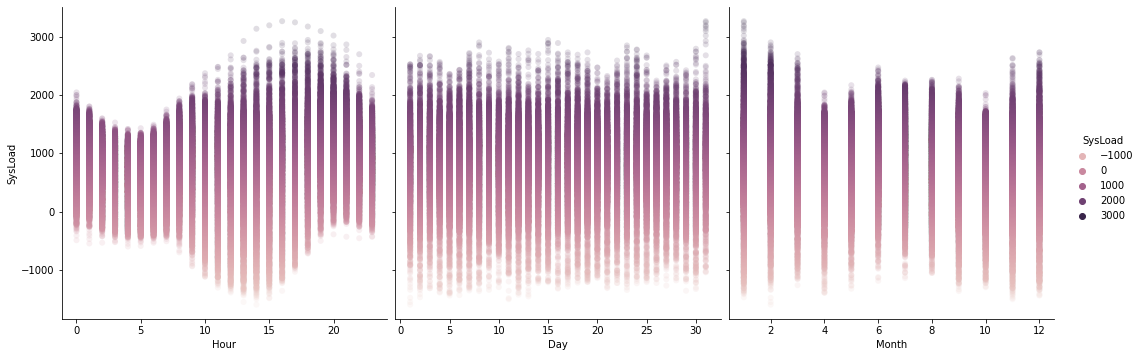

In [36]:
sns.pairplot(elecDf.dropna(),
             hue='SysLoad',
             x_vars=['Hour','Day',
                     'Month'],
             y_vars='SysLoad',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.show()

<Figure size 1080x720 with 0 Axes>

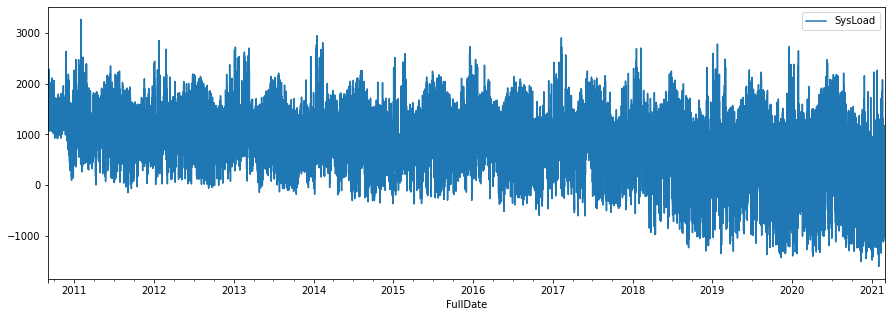

In [37]:
plt.figure(figsize = (15, 10))
elecDf.plot(x = 'FullDate', y = 'SysLoad', figsize=(15,5))

<Figure size 1080x720 with 0 Axes>

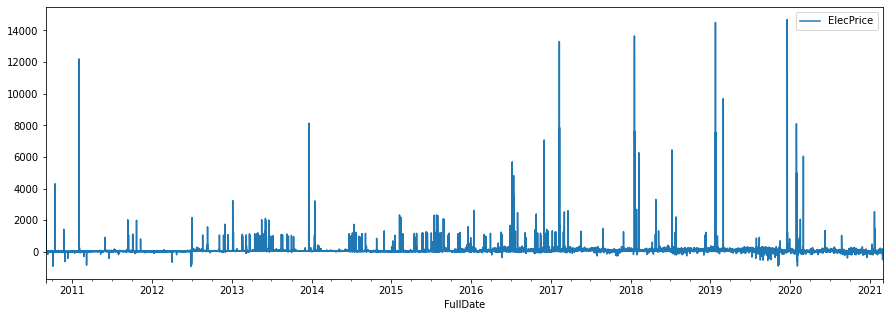

In [38]:
plt.figure(figsize = (15, 10))
elecDf.plot(x = 'FullDate', y = 'ElecPrice', figsize=(15,5))

In [39]:
import statsmodels.api as sm
from pylab import rcParams

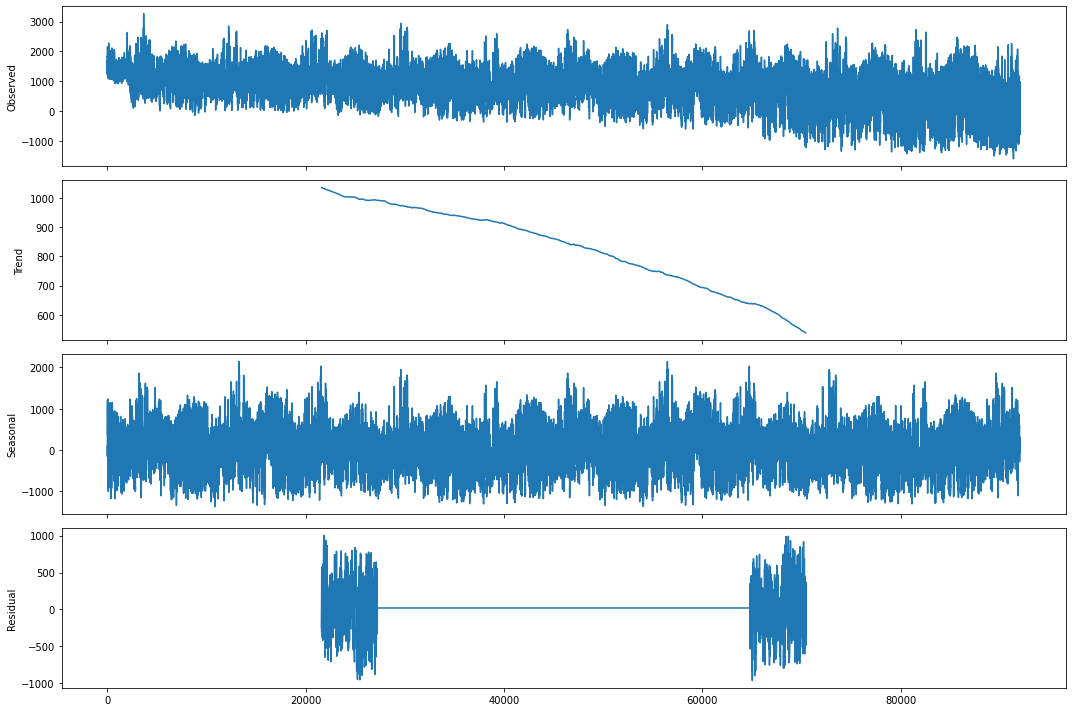

In [40]:
rcParams['figure.figsize'] = 15, 10
decompose_series = sm.tsa.seasonal_decompose(elecDf['SysLoad'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [41]:
dailyDf = elecDf.groupby(['Year', 'Month', 'Day']).sum()
dailyDf

Tmax      SysLoad  GasPrice  ElecPrice  Hour
Year Month Day                                               
2010 9     1    379.2  41565.38000   88.5600   2751.700   276
           2    369.6  38898.99000   88.5600    570.810   276
           3    439.2  41665.76000  106.8000    504.975   276
           4    328.8  35638.08500   81.3600    502.275   276
           5    357.6  35611.41000  106.8000    500.555   276
...               ...          ...       ...        ...   ...
2021 2     24   537.6  -1525.49745  134.4000    634.770   276
           25   518.4   4539.07855  130.5048    577.515   276
           26   547.2   9517.02430  130.1808   1445.495   276
           27   564.0   4932.88015  130.0800    488.980   276
           28   583.2   6675.05485  131.6352    -98.985   276

[3834 rows x 5 columns]

In [42]:
dailyDf = dailyDf.reset_index()
dailyDf

,Year,Month,Day,Tmax,SysLoad,GasPrice,ElecPrice,Hour
0,2010,9,1,379.2,41565.38000,88.5600,2751.700,276
1,2010,9,2,369.6,38898.99000,88.5600,570.810,276
2,2010,9,3,439.2,41665.76000,106.8000,504.975,276
3,2010,9,4,328.8,35638.08500,81.3600,502.275,276
4,2010,9,5,357.6,35611.41000,106.8000,500.555,276
...,...,...,...,...,...,...,...,...
3829,2021,2,24,537.6,-1525.49745,134.4000,634.770,276
3830,2021,2,25,518.4,4539.07855,130.5048,577.515,276
3831,2021,2,26,547.2,9517.02430,130.1808,1445.495,276
3832,2021,2,27,564.0,4932.88015,130.0800,488.980,276


In [43]:
dailyDf['Datetime'] = pd.to_datetime(dailyDf[['Year', 'Month', 'Day']])
dailyDf

,Year,Month,Day,Tmax,SysLoad,GasPrice,ElecPrice,Hour,Datetime
0,2010,9,1,379.2,41565.38000,88.5600,2751.700,276,2010-09-01
1,2010,9,2,369.6,38898.99000,88.5600,570.810,276,2010-09-02
2,2010,9,3,439.2,41665.76000,106.8000,504.975,276,2010-09-03
3,2010,9,4,328.8,35638.08500,81.3600,502.275,276,2010-09-04
4,2010,9,5,357.6,35611.41000,106.8000,500.555,276,2010-09-05
...,...,...,...,...,...,...,...,...,...
3829,2021,2,24,537.6,-1525.49745,134.4000,634.770,276,2021-02-24
3830,2021,2,25,518.4,4539.07855,130.5048,577.515,276,2021-02-25
3831,2021,2,26,547.2,9517.02430,130.1808,1445.495,276,2021-02-26
3832,2021,2,27,564.0,4932.88015,130.0800,488.980,276,2021-02-27


In [44]:
dailyDf.dtypes

Year                  int64
Month                 int64
Day                   int64
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
Hour                  int64
Datetime     datetime64[ns]
dtype: object

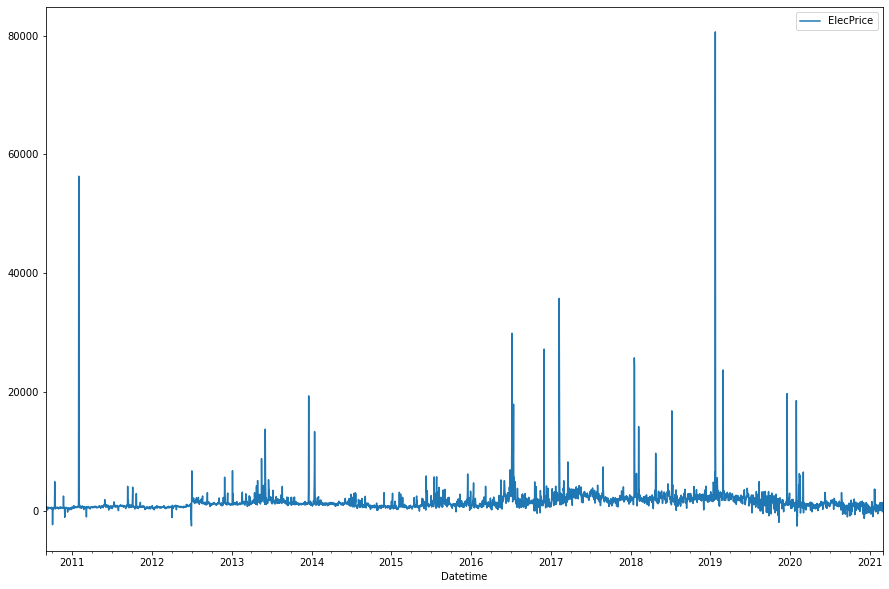

In [58]:
dailyDf.plot(x = 'Datetime', y = 'ElecPrice')

In [45]:
train = dailyDf.iloc[:2757, :]
test = dailyDf.iloc[2757:, :]

In [46]:
train

,Year,Month,Day,Tmax,SysLoad,GasPrice,ElecPrice,Hour,Datetime
0,2010,9,1,379.2,41565.38000,88.5600,2751.700,276,2010-09-01
1,2010,9,2,369.6,38898.99000,88.5600,570.810,276,2010-09-02
2,2010,9,3,439.2,41665.76000,106.8000,504.975,276,2010-09-03
3,2010,9,4,328.8,35638.08500,81.3600,502.275,276,2010-09-04
4,2010,9,5,357.6,35611.41000,106.8000,500.555,276,2010-09-05
...,...,...,...,...,...,...,...,...,...
2752,2018,3,15,609.6,27139.02585,220.6272,2717.340,276,2018-03-15
2753,2018,3,16,648.0,19710.46400,216.9600,2277.335,276,2018-03-16
2754,2018,3,17,724.8,1079.34705,209.0400,1718.385,276,2018-03-17
2755,2018,3,18,508.8,-4102.43795,203.9880,1088.015,276,2018-03-18


#### Univariate

In [18]:
from fbprophet import Prophet

In [47]:
X = train[['Datetime', 'ElecPrice']].rename(columns = {'Datetime':'ds', 'ElecPrice':'y'})
X

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [48]:
model = Prophet()
model.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
y = test[['Datetime', 'ElecPrice']].rename(columns = {'Datetime':'ds', 'ElecPrice':'y'})
y

,ds,y
2757,2018-03-20,1833.000
2758,2018-03-21,1730.490
2759,2018-03-22,2260.550
2760,2018-03-23,2138.760
2761,2018-03-24,1721.700
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [50]:
y_pred = model.predict(y)

In [51]:
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,259.870951,4946.867545,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,347.806795,5117.059012,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,400.254577,5089.166609,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,176.193564,5011.501977,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-32.802705,4759.192146,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


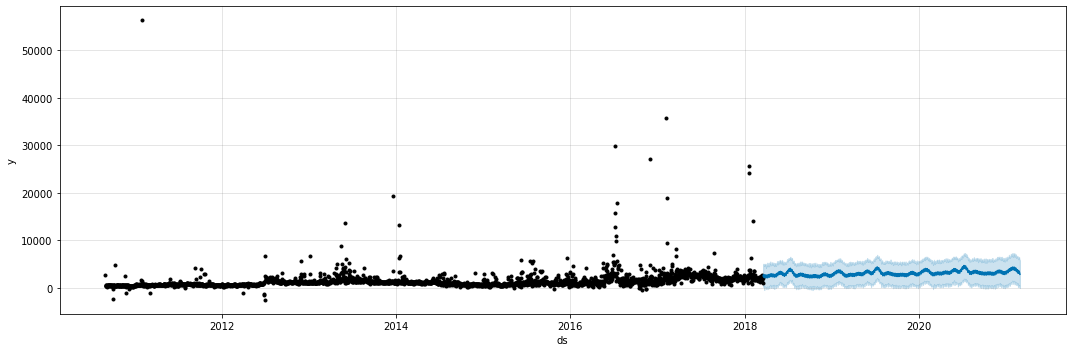

In [52]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred,
                 ax=ax)
plt.show()

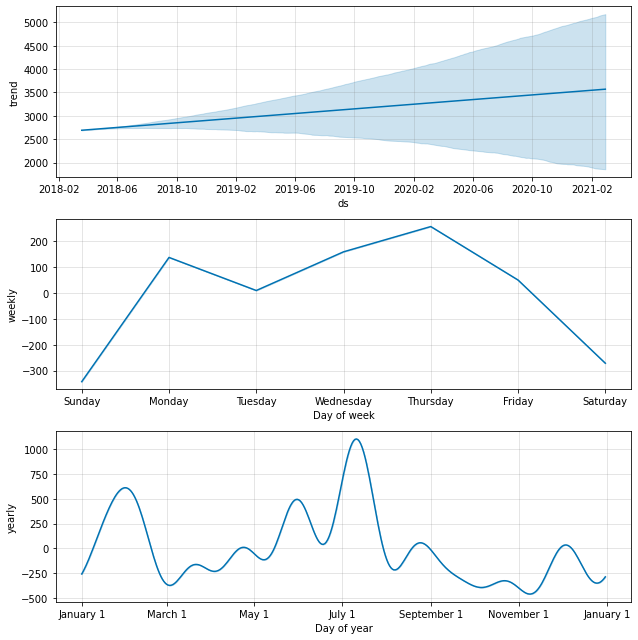

In [53]:
fig = model.plot_components(y_pred)

In [60]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(dailyDf['SysLoad'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [61]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(dailyDf['GasPrice'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [62]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(dailyDf['ElecPrice'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


### MAPE

In [66]:
def mape(true, pred): 
    true = np.array(true)
    pred = np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

In [67]:
mape(y['y'], y_pred['yhat'])

549.4751413716547

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y['y'], y_pred['yhat'])

10356526.60190019

In [72]:
import math
rmse = math.sqrt(mean_squared_error(y['y'], y_pred['yhat']))
rmse

3218.15577651241

In [73]:
X1 = X.copy()
X1[['SysLoad', 'Tmax', 'GasPrice']] = train[['SysLoad', 'Tmax', 'GasPrice']]
X1

,ds,y,SysLoad,Tmax,GasPrice
0,2010-09-01,2751.700,41565.38000,379.2,88.5600
1,2010-09-02,570.810,38898.99000,369.6,88.5600
2,2010-09-03,504.975,41665.76000,439.2,106.8000
3,2010-09-04,502.275,35638.08500,328.8,81.3600
4,2010-09-05,500.555,35611.41000,357.6,106.8000
...,...,...,...,...,...
2752,2018-03-15,2717.340,27139.02585,609.6,220.6272
2753,2018-03-16,2277.335,19710.46400,648.0,216.9600
2754,2018-03-17,1718.385,1079.34705,724.8,209.0400
2755,2018-03-18,1088.015,-4102.43795,508.8,203.9880


In [89]:
y1 = y.copy()
y1[['SysLoad', 'Tmax', 'GasPrice']] = test[['SysLoad', 'Tmax', 'GasPrice']]
y2 = y1.drop('y', axis = 1)
y2

,ds,SysLoad,Tmax,GasPrice
2757,2018-03-20,7696.91130,540.0,201.5880
2758,2018-03-21,4658.05865,571.2,203.2560
2759,2018-03-22,19161.78525,722.4,203.2560
2760,2018-03-23,18090.43435,811.2,198.6456
2761,2018-03-24,3763.53865,832.8,180.2160
...,...,...,...,...
3829,2021-02-24,-1525.49745,537.6,134.4000
3830,2021-02-25,4539.07855,518.4,130.5048
3831,2021-02-26,9517.02430,547.2,130.1808
3832,2021-02-27,4932.88015,564.0,130.0800


In [90]:
multmodel = Prophet()
multmodel.fit(X1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
y_pred2 = multmodel.predict(y2)

In [92]:
y_pred2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,31.204260,4902.004446,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,362.127324,4961.038446,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,419.102988,5238.730195,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,270.450003,4947.380978,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,7.200155,4716.380359,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,462.511388,6281.674985,1883.600794,5323.314008,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,431.219921,6370.719974,1881.228176,5325.922070,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,309.785453,6195.975487,1878.905981,5328.496820,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,126.378947,5981.721335,1876.649221,5331.068314,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [93]:
mape(y1['y'], y_pred2['yhat'])

549.4751413716547